# Interest Point Detection
You can find the corresponding lecture video under the following link: https://www.youtube.com/watch?v=S4mMhuLHrsQ&list=PLd3hlSJsX_ImKP68wfKZJVIPTd8Ie5u-9&index=4

So what are Points of interests
- The point at which the direction of the boundary of object changes abruptly 
- for example the corners of a triangle could be points of interst 

How to we detect corners? 
- The basic idea is: We move a little window along an edge or line. 
- The change in our window is pretty small independent in what direction we move the small window. 
- But when we reach the corner of the line, the change in the window increases 
- Something like that ...

![Corner Point Detection](images/Corner_Point_Detection1.jpg)

# Mathmatical implementation
The algoritham to detect corners was invented by a british guy called Harris and is called Harris Detector [Harris88]. Its basic steps are the following:
    - Derive the image in x and y direction
    - Build the square of the derivatives 
    - Apply Gaussian filter
    - Apply Cornerness function - calculates the eigenvalues
    
With the x y derivative you get the edges in x and y direction. After you apply a gaussian filter on the image you basicly calulate the intensity of each pixel. For that, you use the cornerness function. That function calculates eigenvalues and if this values are large in both images, the propability that the pixel is part of a corner is high. 

![Eigenvalues](images/Eigenvalues.png)

For more informations and a better explanation check out the wikipedia article about the Harris detector or whatch the lecture 4 again.
The following code shows the opencv implementation on a single image. In the folder "Point_Detector" you can find a .py implementation with a captured webcam. 

Original image


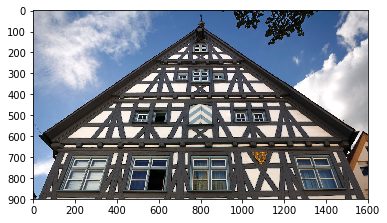

The result: Due to mathplotlib, RGB is somehow changed to BGR or something...


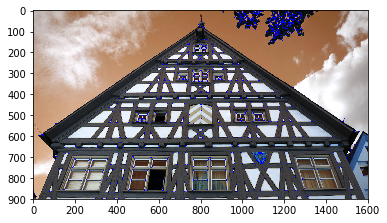

Corrected Version of the Result


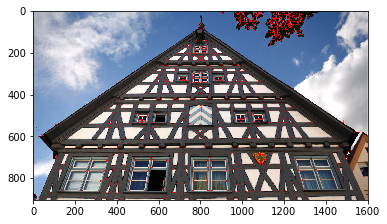

In [35]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


imagecolor =1
img = cv2.imread('images/Fachwerk.jpg',imagecolor) 
if(imagecolor == 0):
    print("You have choosen Grayscale")
    arr = np.asarray(img)
    plt.imshow(arr, cmap='gray')
    plt.show()
else:
    print("Original image")
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()



gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


gray = np.float32(gray)
# (input image, 
# block size(size of neighbourhood considered for detection), 
# ksize(Aperture parameter of Sobel derivative used), 
# k - Harris detector free parameter in the equation)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

print("The result: Due to mathplotlib, RGB is somehow changed to BGR or something...")
plt.imshow(img)
plt.show()

print("Corrected Version of the Result")
result = cv2.imread('images/Result.PNG',imagecolor) 
cv_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(cv_rgb)
plt.show()